## **About Dataset**
* This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? We have to predict passenger satisfaction?

## **Target**
* Satisfied
* Dissatisfied 

# **Approach to the prediction**
* 1.import all libaray
* 2.Load and audit the data 
* 3.Data prepration and Data Transformation
    * 1.missing value
    * 2.Inconsistent value:Replace all transformation with consistent values 
    * 3.outliers
* 4.Data visualization
* 5.Data analysis
    * 1.Uni-variate Analysis(Mean,Median,Mode,Skewness)
    * 2.Bi-variate Analysis(Correlation,Covariance,Chi-Square Test)
    * 3.Multi-Variate Analysis
        * 1.Regression:Not a regressiion 
        * 2.Classification
            * 1.Apply Logistic Regression
            * 2.Apply Decision Tree
            * 3.Apply RandomForestClassifier
            * 4.Apply AdaBoostClassifier
            * 5.Apply GradientBoostingClassifier
            * 6.Apply KNeighborsClassifier
            * 7.Apply SVC
            * 8.Evalaute Between Logistic, Decision Tree, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, KNeighborsClassifier,SVC Which is the better model

## **IMPORT ALL LIBRARIES**

In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)


In [19]:
df=pd.read_csv('train.csv')
df.sample(6)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103828,103828,40098,Female,disloyal Customer,21,Business travel,Eco,200,5,0,5,1,5,5,5,5,4,2,1,3,5,5,0,0.0,satisfied
57468,57468,54369,Female,disloyal Customer,22,Business travel,Eco,1235,5,5,5,4,2,5,2,2,2,1,2,3,2,2,0,0.0,satisfied
24091,24091,119367,Female,Loyal Customer,58,Business travel,Business,3980,4,4,4,4,3,4,5,4,4,4,4,3,4,4,0,0.0,satisfied
40978,40978,77825,Male,Loyal Customer,59,Personal Travel,Eco,731,2,1,2,3,2,4,2,2,1,4,3,2,1,2,288,279.0,dissatisfied
18523,18523,80595,Female,Loyal Customer,8,Business travel,Business,1747,3,3,3,3,4,4,4,4,3,5,5,3,5,4,0,0.0,satisfied
3370,3370,61211,Female,Loyal Customer,57,Business travel,Eco,967,1,5,3,3,4,3,3,1,1,1,1,2,1,3,5,0.0,dissatisfied


In [20]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

## **Filling Null values in column: Arrival Delay in Minutes** 

In [22]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [23]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## **Changing d.Type**

In [24]:
# Float to int64
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].astype('Int64')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Unnamed: 0                         103904 non-null  int64 
 1   id                                 103904 non-null  int64 
 2   Gender                             103904 non-null  object
 3   Customer Type                      103904 non-null  object
 4   Age                                103904 non-null  int64 
 5   Type of Travel                     103904 non-null  object
 6   Class                              103904 non-null  object
 7   Flight Distance                    103904 non-null  int64 
 8   Inflight wifi service              103904 non-null  int64 
 9   Departure/Arrival time convenient  103904 non-null  int64 
 10  Ease of Online booking             103904 non-null  int64 
 11  Gate location                      103904 non-null  

## **Dropping unnecessary column**

In [26]:
df.drop(df.iloc[:,0:2],axis=1,inplace=True)

In [27]:
df.sample(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
74433,Male,Loyal Customer,8,Business travel,Business,2859,2,1,1,1,2,2,2,2,2,2,4,3,3,2,4,12,dissatisfied
68848,Male,disloyal Customer,23,Business travel,Eco,907,4,4,4,1,3,4,1,3,3,5,5,5,4,3,78,93,dissatisfied
77844,Male,Loyal Customer,24,Business travel,Business,2167,4,4,4,4,5,5,5,5,5,4,4,4,5,5,0,0,satisfied
73832,Male,Loyal Customer,52,Business travel,Business,386,2,2,2,2,2,2,5,5,5,5,5,4,5,4,24,16,satisfied
48301,Female,disloyal Customer,25,Business travel,Eco,192,2,2,2,2,4,2,4,4,2,1,3,1,3,4,21,23,dissatisfied
21665,Female,Loyal Customer,28,Business travel,Eco,674,4,2,2,2,4,4,4,4,2,4,2,2,1,4,23,7,satisfied
77011,Male,Loyal Customer,22,Business travel,Eco,650,4,4,4,4,4,4,4,4,1,2,1,3,3,4,5,2,satisfied
83493,Male,Loyal Customer,22,Business travel,Eco,1235,3,3,3,3,3,3,3,3,4,2,4,3,3,3,35,35,dissatisfied
42322,Female,Loyal Customer,11,Personal Travel,Eco,588,4,4,4,3,4,4,4,4,5,2,4,4,5,4,0,0,satisfied
73096,Male,disloyal Customer,49,Business travel,Business,247,3,3,3,4,5,3,5,5,4,5,4,3,5,5,0,0,dissatisfied


### Since we having [Departure/Arrival time convenient] column so we can remove both ['Departure Delay in Minutes', 'Arrival Delay in Minutes'] column

In [28]:
df.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'],axis=1,inplace=True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied


In [29]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


## **RENAME THE COLUMNS**

In [30]:
df.rename(columns={'Customer Type':'Customer_type','Type of Travel':'Type_of_Travel','Flight Distance':'Flight_Distance','Inflight wifi service':'Inflight_wifi_service','Departure/Arrival time convenient':'Departure_or_Arrival_time_convenient','Ease of Online booking':'Ease_of_Online_booking','Gate location':'Gate_location','Food and drink':'Food_and_drink','Online boarding':'Online_boarding','Seat comfort':'Seat_comfort','Inflight entertainment':'Inflight_entertainment','On-board service':'On_board_service','Leg room service':'Leg_room_service','Baggage handling':'Baggage_handling','Baggage handling':'Baggage_handling','Checkin service':'Checkin_service','Inflight service':'Inflight_service'},inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 21 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   Gender                                103904 non-null  object
 1   Customer_type                         103904 non-null  object
 2   Age                                   103904 non-null  int64 
 3   Type_of_Travel                        103904 non-null  object
 4   Class                                 103904 non-null  object
 5   Flight_Distance                       103904 non-null  int64 
 6   Inflight_wifi_service                 103904 non-null  int64 
 7   Departure_or_Arrival_time_convenient  103904 non-null  int64 
 8   Ease_of_Online_booking                103904 non-null  int64 
 9   Gate_location                         103904 non-null  int64 
 10  Food_and_drink                        103904 non-null  int64 
 11  Online_boardi

## Data Visualization

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight_Distance'}>,
        <AxesSubplot:title={'center':'Inflight_wifi_service'}>,
        <AxesSubplot:title={'center':'Departure_or_Arrival_time_convenient'}>],
       [<AxesSubplot:title={'center':'Ease_of_Online_booking'}>,
        <AxesSubplot:title={'center':'Gate_location'}>,
        <AxesSubplot:title={'center':'Food_and_drink'}>,
        <AxesSubplot:title={'center':'Online_boarding'}>],
       [<AxesSubplot:title={'center':'Seat_comfort'}>,
        <AxesSubplot:title={'center':'Inflight_entertainment'}>,
        <AxesSubplot:title={'center':'On_board_service'}>,
        <AxesSubplot:title={'center':'Leg_room_service'}>],
       [<AxesSubplot:title={'center':'Baggage_handling'}>,
        <AxesSubplot:title={'center':'Checkin_service'}>,
        <AxesSubplot:title={'center':'Inflight_service'}>,
        <AxesSubplot:title={'center':'Cleanliness'}>]], dtype=object)

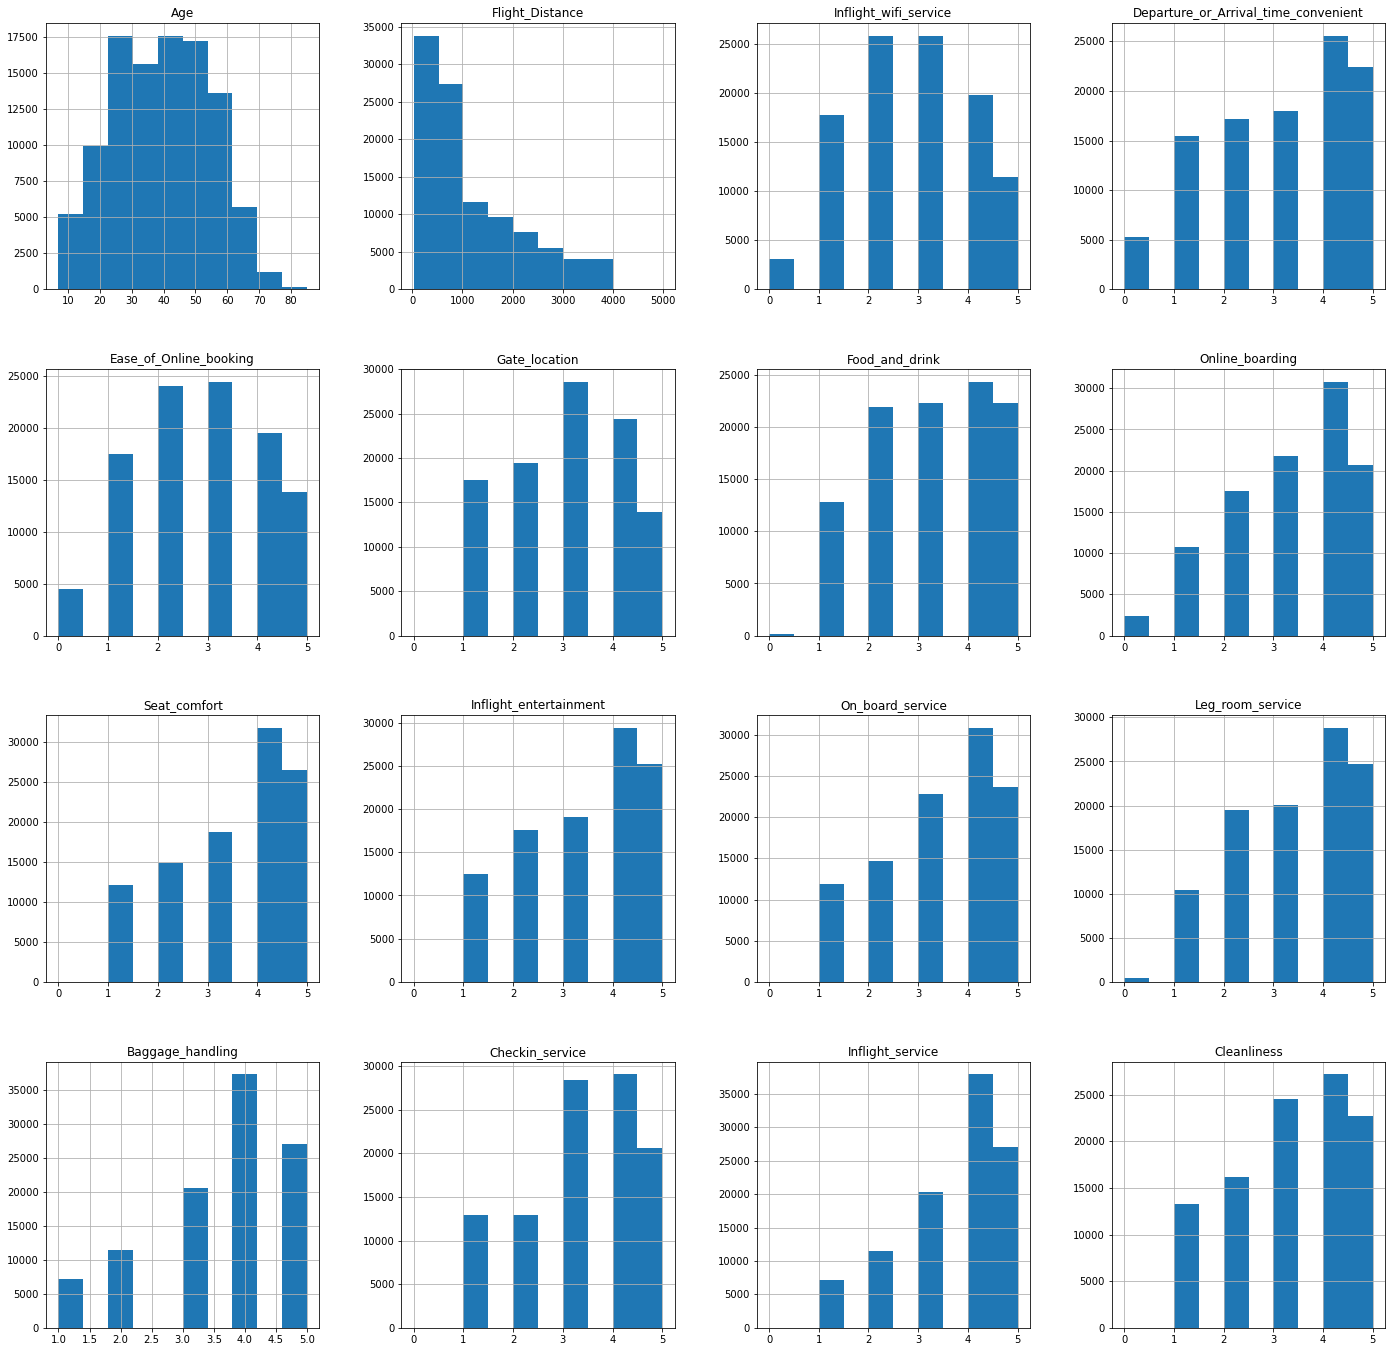

In [32]:
df.hist(figsize=(24,24))

# Flight_Distance: Mostly travelling for shorter Distance 
# Inflight_wifi_service:Average satisfaction with Inflight wifi service



<AxesSubplot:>

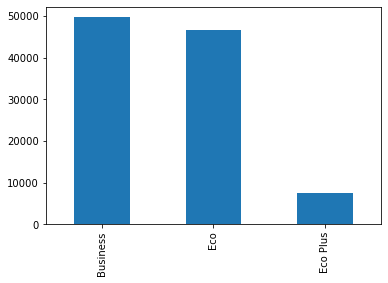

In [33]:
# Very less Eco plus class travellers
df['Class'].value_counts().plot(kind='bar')

<AxesSubplot:>

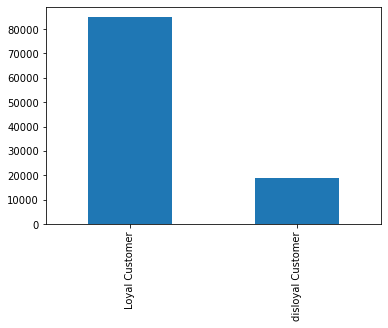

In [34]:
# Most are loyal Customers
df['Customer_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

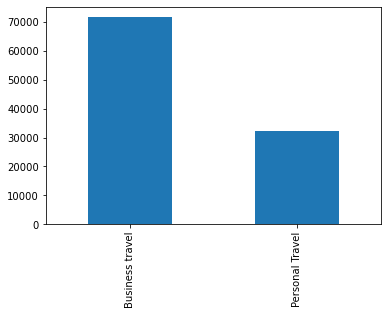

In [35]:
# Most of travellers having business travel
df['Type_of_Travel'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Flight_Distance', ylabel='Age'>

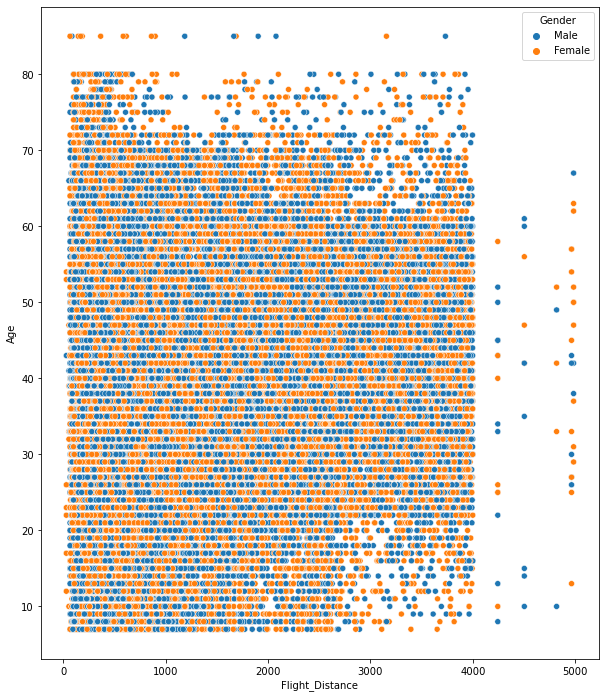

In [36]:
# bivariate
plt.figure(figsize=(10,12))
sns.scatterplot(df['Flight_Distance'],df['Age'],hue=df['Gender'])

<AxesSubplot:xlabel='Class', ylabel='Age'>

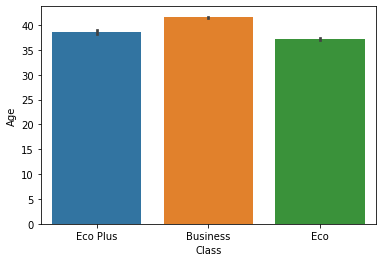

In [37]:
sns.barplot(df['Class'],df['Age'])

<AxesSubplot:xlabel='Customer_type', ylabel='Age'>

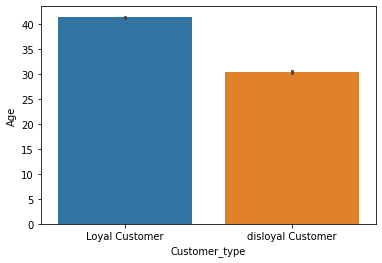

In [38]:
sns.barplot(df['Customer_type'],df['Age'])
#youngsters are more disloyal

<AxesSubplot:xlabel='Customer_type', ylabel='Class'>

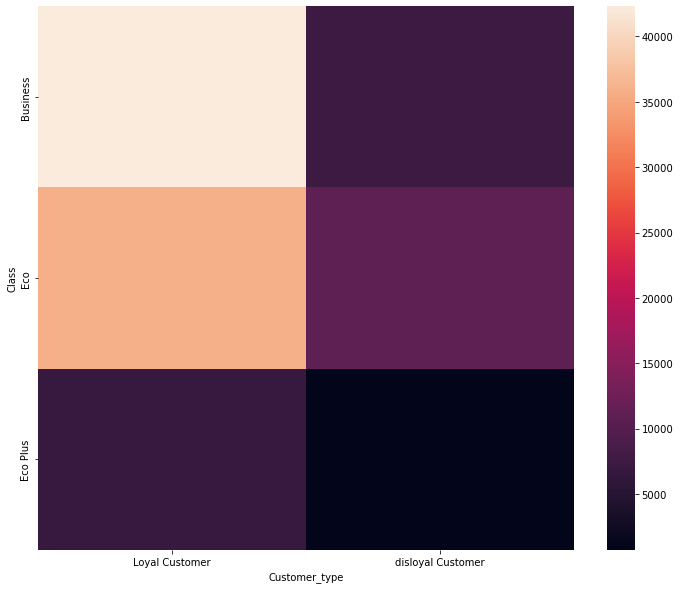

In [39]:
plt.figure(figsize=(12,10))
sns.heatmap(pd.crosstab(df['Class'],df['Customer_type']))
# we can see Business class travellers are more loyal whereas Eco_plus travellers ain't

<AxesSubplot:>

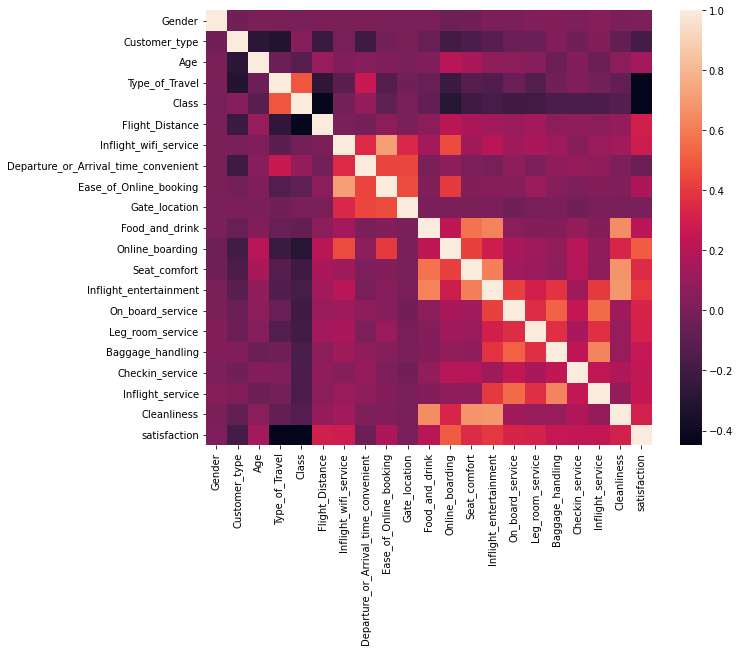

In [102]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
# Not much correlation

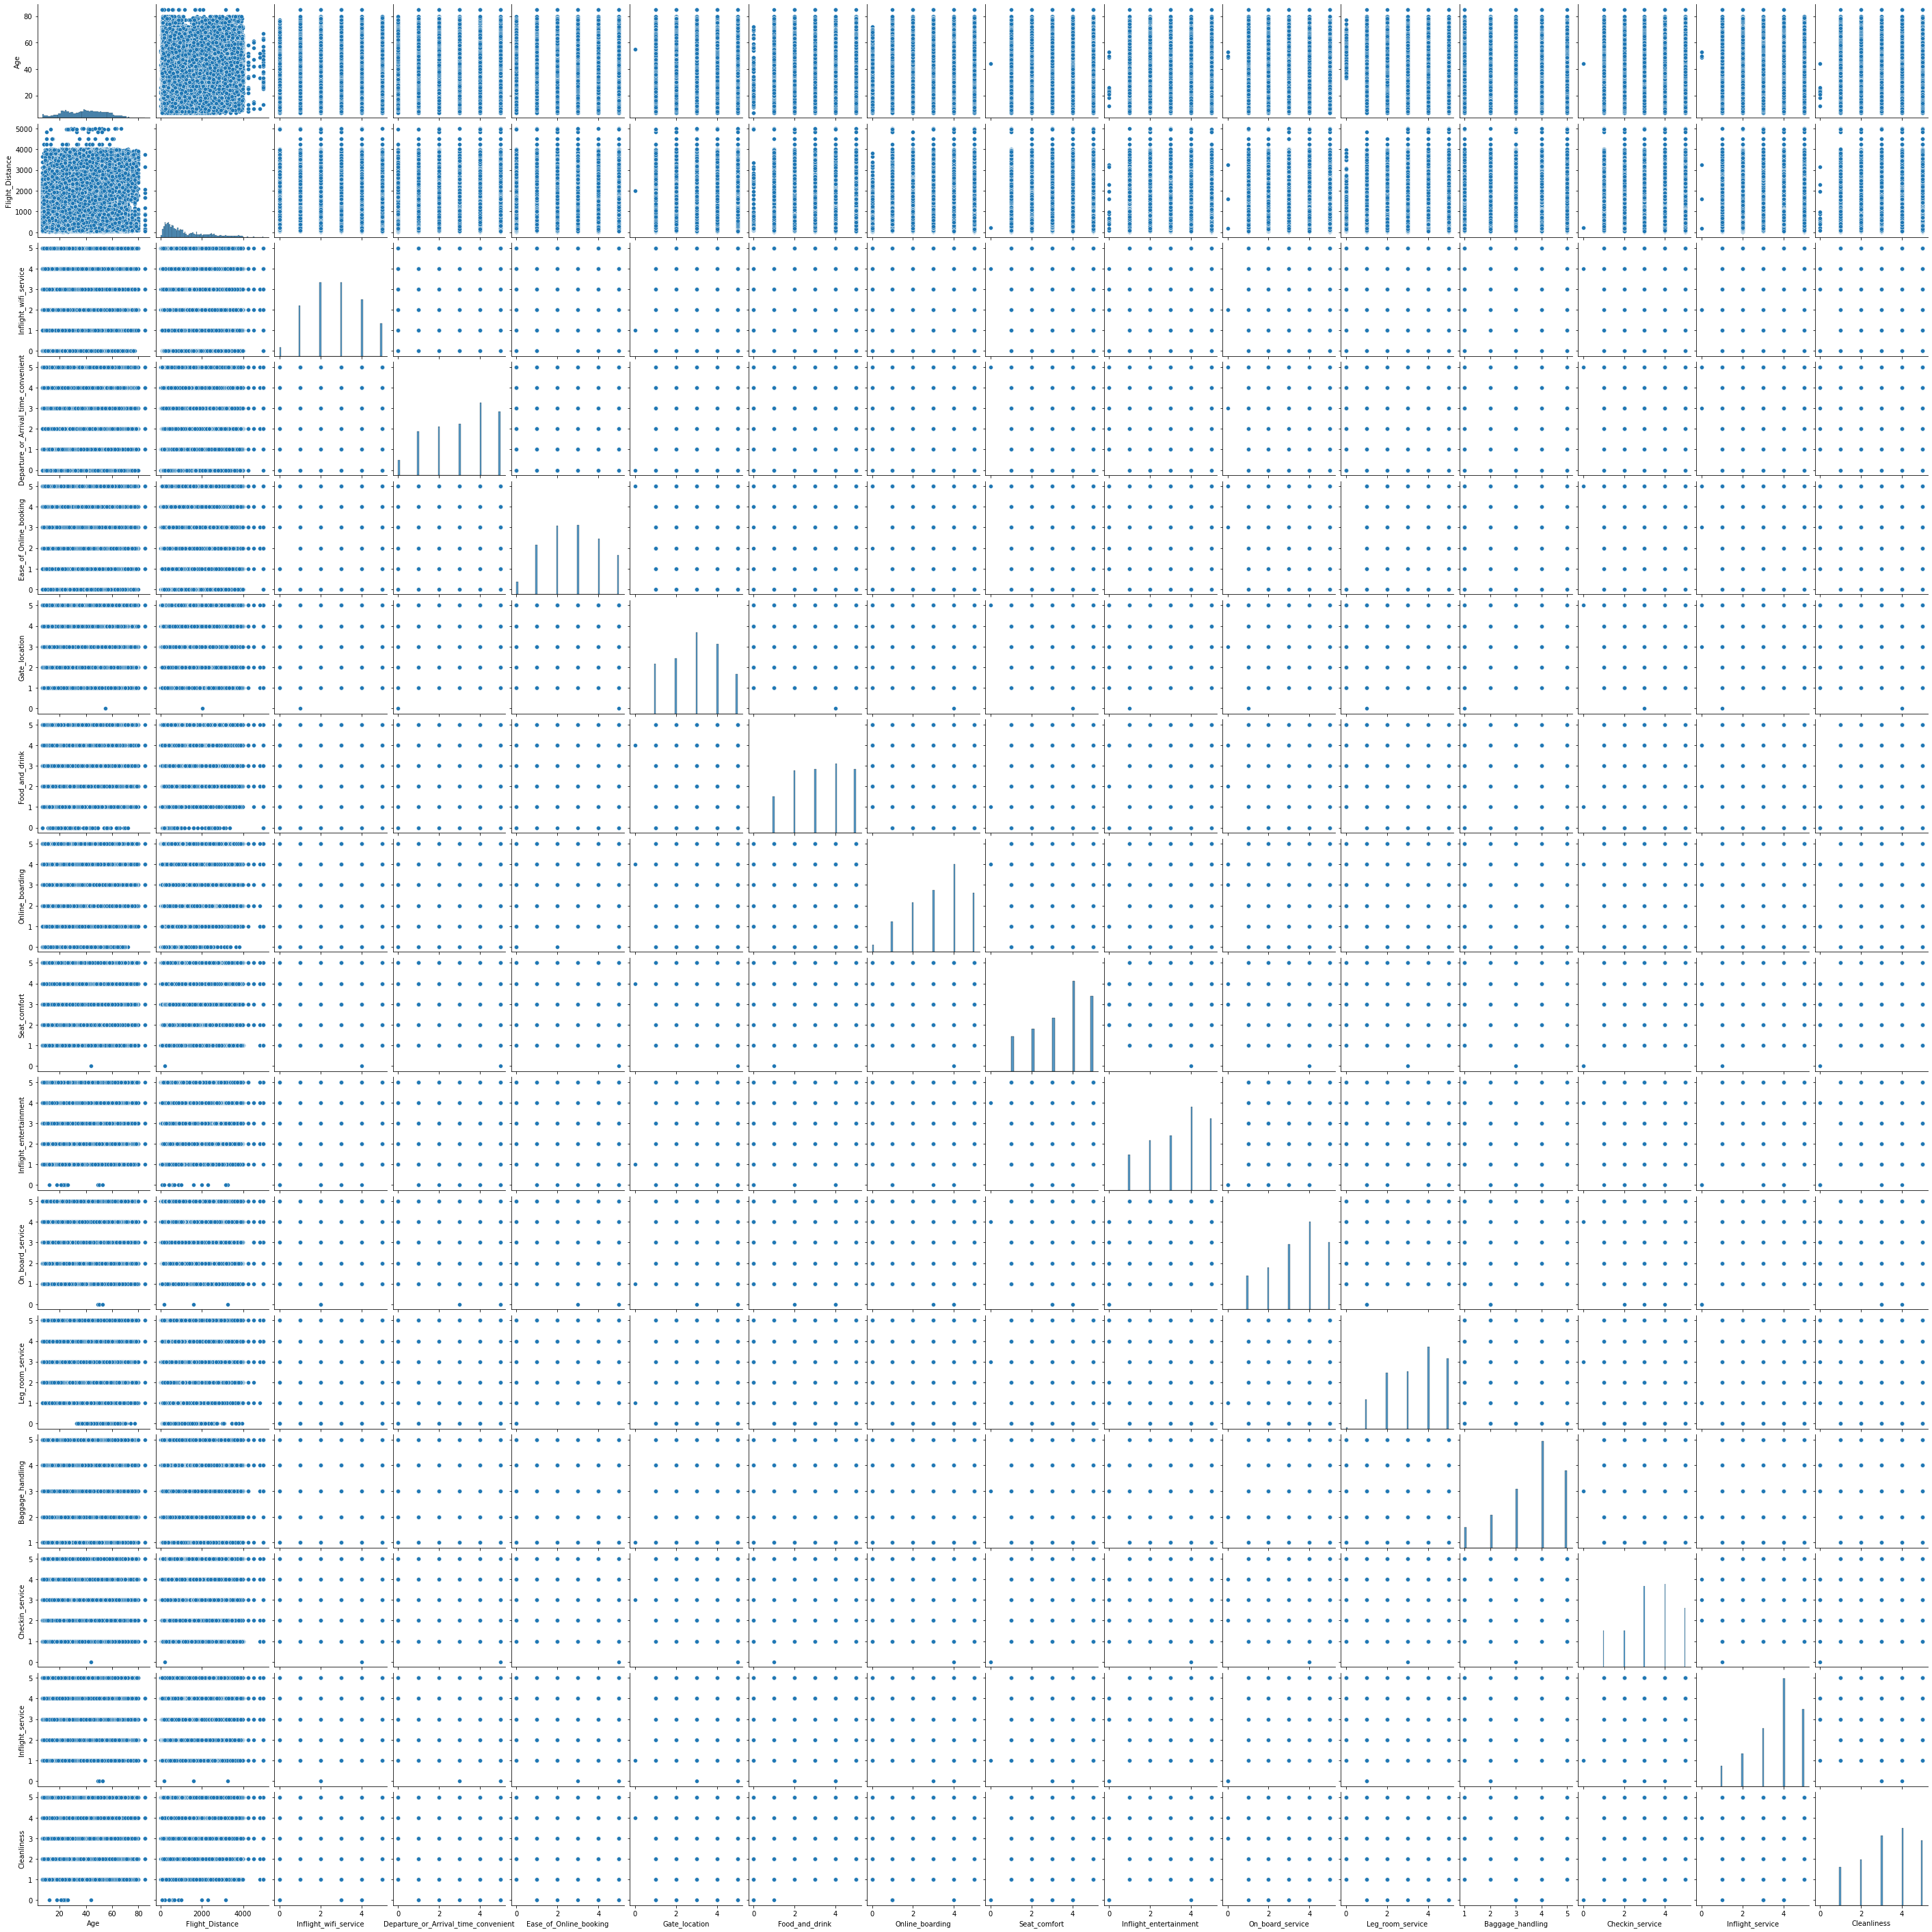

In [41]:
sns.pairplot(df,diag_kind='hist')

## **ENCODING**

In [42]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        le_enc=le.fit_transform(df[i])
        df[i]=le_enc

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 21 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   Gender                                103904 non-null  int32
 1   Customer_type                         103904 non-null  int32
 2   Age                                   103904 non-null  int64
 3   Type_of_Travel                        103904 non-null  int32
 4   Class                                 103904 non-null  int32
 5   Flight_Distance                       103904 non-null  int64
 6   Inflight_wifi_service                 103904 non-null  int64
 7   Departure_or_Arrival_time_convenient  103904 non-null  int64
 8   Ease_of_Online_booking                103904 non-null  int64
 9   Gate_location                         103904 non-null  int64
 10  Food_and_drink                        103904 non-null  int64
 11  Online_boarding           

## **Train and Test Split**

In [44]:
x=df.iloc[:,:-1]
y=df['satisfaction']

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(83123, 20)
(83123,)
(20781, 20)
(20781,)


## **SCALING**

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scalar=StandardScaler()

In [49]:
xtrain_scal=scalar.fit_transform(xtrain)


In [50]:
xtest_scal=scalar.fit_transform(xtest)


## **LOGISTIC REGRESSION**

In [51]:
lgr=LogisticRegression()
lgr.fit(xtrain_scal,ytrain)
ypred_train_lgr=lgr.predict(xtrain_scal)
ypred_test_lgr=lgr.predict(xtest_scal)

In [52]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

In [53]:
acc_report(ytrain,ypred_train_lgr)

the accuracy of tha model is  0.8740300518508716
[[42658  4508]
 [ 5963 29994]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     47166
           1       0.87      0.83      0.85     35957

    accuracy                           0.87     83123
   macro avg       0.87      0.87      0.87     83123
weighted avg       0.87      0.87      0.87     83123



In [54]:
acc_report(ytest,ypred_test_lgr)

the accuracy of tha model is  0.8771473942543669
[[10637  1076]
 [ 1477  7591]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11713
           1       0.88      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



In [55]:
lgr.coef_

array([[ 0.02561149, -0.79356974, -0.12024004, -1.29693698, -0.34686982,
        -0.00201003,  0.50918017, -0.17620982, -0.19941104,  0.03084588,
        -0.01807444,  0.83140574,  0.09093675,  0.07893738,  0.39917989,
         0.32255273,  0.15079262,  0.40430988,  0.16328931,  0.26863684]])

* ## The logistic regression model is not producing the desired outcome.


## **DECISION TREE**

In [56]:
dtr=DecisionTreeClassifier(max_depth=11,min_samples_split=8)
dtr.fit(xtrain,ytrain)


DecisionTreeClassifier(max_depth=11, min_samples_split=8)

In [57]:
y_pred_train_dtr=dtr.predict(xtrain)
y_pred_test_dtr=dtr.predict(xtest)

In [58]:
acc_report(ytrain,y_pred_train_dtr)

the accuracy of tha model is  0.9548380111401177
[[46103  1063]
 [ 2691 33266]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     47166
           1       0.97      0.93      0.95     35957

    accuracy                           0.95     83123
   macro avg       0.96      0.95      0.95     83123
weighted avg       0.96      0.95      0.95     83123



In [59]:
acc_report(ytest,y_pred_test_dtr)

the accuracy of tha model is  0.9492805928492373
[[11388   325]
 [  729  8339]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     11713
           1       0.96      0.92      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



* ## The decision tree model is achieving higher Accuracy than the logistic regression model.


## **RANDOM FOREST**

In [60]:
rf=RandomForestClassifier(n_estimators=20,max_depth=11,verbose=1)
rf.fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.7s finished


RandomForestClassifier(max_depth=11, n_estimators=20, verbose=1)

In [61]:
y_pred_train_rf=rf.predict(xtrain)
y_pred_test_rf=rf.predict(xtest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished


In [62]:
acc_report(ytrain,y_pred_train_rf)

the accuracy of tha model is  0.95594480468703
[[45720  1446]
 [ 2216 33741]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     47166
           1       0.96      0.94      0.95     35957

    accuracy                           0.96     83123
   macro avg       0.96      0.95      0.96     83123
weighted avg       0.96      0.96      0.96     83123



In [63]:
acc_report(ytest,y_pred_test_rf)

the accuracy of tha model is  0.9508204609980271
[[11297   416]
 [  606  8462]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11713
           1       0.95      0.93      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



* ## Random forest also producing good Accuracy score

## **IMPLEMENTATION OF ADABOOST**

In [64]:
ada=AdaBoostClassifier(n_estimators=200,learning_rate=0.9623)
ada.fit(xtrain,ytrain)

AdaBoostClassifier(learning_rate=0.9623, n_estimators=200)

In [65]:
y_pred_train_ada=ada.predict(xtrain)
y_pred_test_ada=ada.predict(xtest)


In [66]:
acc_report(ytrain,y_pred_train_ada)

the accuracy of tha model is  0.929814852688185
[[44461  2705]
 [ 3129 32828]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     47166
           1       0.92      0.91      0.92     35957

    accuracy                           0.93     83123
   macro avg       0.93      0.93      0.93     83123
weighted avg       0.93      0.93      0.93     83123



In [67]:
acc_report(ytest,y_pred_test_ada)

the accuracy of tha model is  0.9301284827486647
[[11054   659]
 [  793  8275]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     11713
           1       0.93      0.91      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781



* ## ADABOOST also producing good Accuracy score

## **GRADIENT BOOSTING ALGORITHM**

In [68]:
gb=GradientBoostingClassifier(learning_rate=0.9445)
gb.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.9445)

In [69]:
y_pred_train_gb=gb.predict(xtrain)
y_pred_test_gb=gb.predict(xtest)


In [70]:
acc_report(ytrain,y_pred_train_gb)

the accuracy of tha model is  0.9634156611286888
[[46107  1059]
 [ 1982 33975]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     47166
           1       0.97      0.94      0.96     35957

    accuracy                           0.96     83123
   macro avg       0.96      0.96      0.96     83123
weighted avg       0.96      0.96      0.96     83123



In [71]:
acc_report(ytest,y_pred_test_gb)

the accuracy of tha model is  0.9572686588710841
[[11371   342]
 [  546  8522]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11713
           1       0.96      0.94      0.95      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



* ## GRADIENT BOOSTING also producing good Accuracy score

## **XGBOOST**

In [72]:
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [73]:
y_pred_xtrain_xgb=xgb.predict(xtrain)
y_pred_xtest_xgb=xgb.predict(xtest)

In [74]:
acc_report(ytrain,y_pred_xtrain_xgb)

the accuracy of tha model is  0.9761558172828219
[[46638   528]
 [ 1454 34503]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     47166
           1       0.98      0.96      0.97     35957

    accuracy                           0.98     83123
   macro avg       0.98      0.97      0.98     83123
weighted avg       0.98      0.98      0.98     83123



In [75]:
acc_report(ytest,y_pred_xtest_xgb)

the accuracy of tha model is  0.9620807468360522
[[11463   250]
 [  538  8530]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



* ## XGBoost model is achieving good accuracy score but there is some variance in accuracy.


## **KNN**

In [76]:
np.sqrt(100000)

316.22776601683796

In [77]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [78]:
y_pred_xtrain_knn=knn.predict(xtrain)
y_pred_xtest_knn=knn.predict(xtest)

In [79]:
acc_report(ytrain,y_pred_xtrain_knn)

the accuracy of tha model is  0.8688449646908798
[[42935  4231]
 [ 6671 29286]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     47166
           1       0.87      0.81      0.84     35957

    accuracy                           0.87     83123
   macro avg       0.87      0.86      0.87     83123
weighted avg       0.87      0.87      0.87     83123



In [80]:
acc_report(ytest,y_pred_xtest_knn)

the accuracy of tha model is  0.8093450748279678
[[10074  1639]
 [ 2323  6745]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84     11713
           1       0.80      0.74      0.77      9068

    accuracy                           0.81     20781
   macro avg       0.81      0.80      0.80     20781
weighted avg       0.81      0.81      0.81     20781



* ## KNN is not performing well it's achieving high bias and high variance

## **SVC**

In [81]:
svc=SVC()
svc.fit(xtrain,ytrain)

SVC()

In [82]:
y_pred_train_svc=svc.predict(xtrain)
y_pred_test_svc=svc.predict(xtest)


In [83]:
acc_report(ytrain,y_pred_train_svc)

the accuracy of tha model is  0.6687920310864622
[[39440  7726]
 [19805 16152]]
              precision    recall  f1-score   support

           0       0.67      0.84      0.74     47166
           1       0.68      0.45      0.54     35957

    accuracy                           0.67     83123
   macro avg       0.67      0.64      0.64     83123
weighted avg       0.67      0.67      0.65     83123



In [84]:
acc_report(ytest,y_pred_test_svc)

the accuracy of tha model is  0.6677734468986093
[[9799 1914]
 [4990 4078]]
              precision    recall  f1-score   support

           0       0.66      0.84      0.74     11713
           1       0.68      0.45      0.54      9068

    accuracy                           0.67     20781
   macro avg       0.67      0.64      0.64     20781
weighted avg       0.67      0.67      0.65     20781



* ## SVC is not performing well it's achieving bad Accuracy Score

## **NAVIE BAYES**

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)

GaussianNB()

In [87]:
y_pred_train_gnb=gnb.predict(xtrain)
y_pred_test_gnb=gnb.predict(xtest)

In [88]:
acc_report(ytrain,y_pred_train_gnb)

the accuracy of tha model is  0.8659456468125549
[[42587  4579]
 [ 6564 29393]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88     47166
           1       0.87      0.82      0.84     35957

    accuracy                           0.87     83123
   macro avg       0.87      0.86      0.86     83123
weighted avg       0.87      0.87      0.87     83123



In [89]:
acc_report(ytest,y_pred_test_gnb)

the accuracy of tha model is  0.8679563062412781
[[10584  1129]
 [ 1615  7453]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     11713
           1       0.87      0.82      0.84      9068

    accuracy                           0.87     20781
   macro avg       0.87      0.86      0.86     20781
weighted avg       0.87      0.87      0.87     20781



* ## Naive Bayes is not producing desired outcome

## **Depolyment of the model**

In [90]:
import pickle
import gradio as gr

In [91]:
with open('gb_model.pkl','wb') as f:
    pickle.dump(gb,f)

In [96]:
def make_prediction(Gender,Customer_type,Age,Type_of_Travel,Class,
       Flight_Distance,Inflight_wifi_service,
       Departure_or_Arrival_time_convenient,Ease_of_Online_booking,
       Gate_location,Food_and_drink,Online_boarding,Seat_comfort,
       Inflight_entertainment, On_board_service,Leg_room_service,
       Baggage_handling,Checkin_service,Inflight_service,
       Cleanliness):
    with open('gb_model.pkl','rb')as f:
        clf=pickle.load(f)
        pred=clf.predict([[Gender,Customer_type,Age,Type_of_Travel,Class,
       Flight_Distance,Inflight_wifi_service,
       Departure_or_Arrival_time_convenient,Ease_of_Online_booking,
       Gate_location,Food_and_drink,Online_boarding,Seat_comfort,
       Inflight_entertainment, On_board_service,Leg_room_service,
       Baggage_handling,Checkin_service,Inflight_service,
       Cleanliness]])
    if pred==0:
        return('Dissatisfied')
    else:
        return('satisfied')

In [93]:
Gender=gr.Number(label='Enter the Gender:0,1')
Customer_type=gr.Number(label='Enter the Customer_type:0,1')
Age=gr.Number(label='Enter the Age:Any-Number')
Type_of_Travel=gr.Number(label='Enter the Type_of_Travel:0,1')
Class=gr.Number(label='Enter the Class:0,1,2')
Flight_Distance=gr.Number(label='Enter the Flight_Distance:Any-Number')
Inflight_wifi_service=gr.Number(label='Enter the satisfaction for Inflight_wifi_service:0,1,2,3,4,5')
Departure_or_Arrival_time_convenient=gr.Number(label='Enter the satisfaction for Departure_or_Arrival_time_convenient:0,1,2,3,4,5')
Ease_of_Online_booking=gr.Number(label='Enter the Ease_of_Online_booking:0,1,2,3,4,5')
Gate_location=gr.Number(label='Enter the satisfaction for Gate_location:0,1,2,3,4,5')
Food_and_drink=gr.Number(label='Enter the satisfaction for Food_and_drink:0,1,2,3,4,5')
Online_boarding=gr.Number(label='Enter the satisfaction for Online_boarding:0,1,2,3,4,5')
Seat_comfort=gr.Number(label='Enter the satisfaction for Seat_comfort:0,1,2,3,4,5')
Inflight_entertainment=gr.Number(label='Enter the satisfaction for Inflight_entertainment:0,1,2,3,4,5')
On_board_service=gr.Number(label='Enter the satisfaction for On_board_service:0,1,2,3,4,5')
Inflight_entertainment=gr.Number(label='Enter the satisfaction for Inflight_entertainment:0,1,2,3,4,5')
Leg_room_service=gr.Number(label='Enter the satisfaction for Leg_room_service:0,1,2,3,4,5')
Baggage_handling=gr.Number(label='Enter the satisfaction for Baggage_handling:0,1,2,3,4,5')
Checkin_service=gr.Number(label='Enter the satisfaction for Checkin_service:0,1,2,3,4,5')
Inflight_service=gr.Number(label='Enter the satisfaction for Inflight_service:0,1,2,3,4,5')
Cleanliness=gr.Number(label='Enter the satisfaction for Cleanliness:0,1,2,3,4,5')

# OUTPUT
output=gr.Textbox()

In [94]:
app=gr.Interface(fn=make_prediction,inputs=[Gender,Customer_type,Age,Type_of_Travel,Class,
       Flight_Distance,Inflight_wifi_service,
       Departure_or_Arrival_time_convenient,Ease_of_Online_booking,
       Gate_location,Food_and_drink,Online_boarding,Seat_comfort,
       Inflight_entertainment, On_board_service,Leg_room_service,
       Baggage_handling,Checkin_service,Inflight_service,
       Cleanliness],outputs=output)
app.launch(debug=True)  

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Keyboard interruption in main thread... closing server.


## **XG BOOST & RANDOM FOREST Working well**